<a href="https://colab.research.google.com/github/ravishastri9/Breast_Cancer_Detection_ML/blob/main/Breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Importing Dataset

In [ ]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#Get a count of number of Malignant(4) or Benign(2) cells

In [ ]:
dataset['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

#Visualize the count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


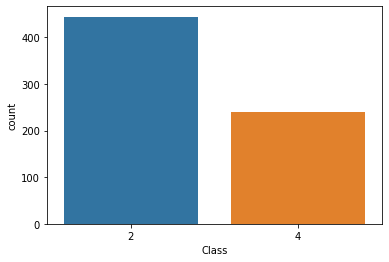

In [ ]:
sns.countplot(dataset['Class'], label = 'count')

#Create a Pairplot

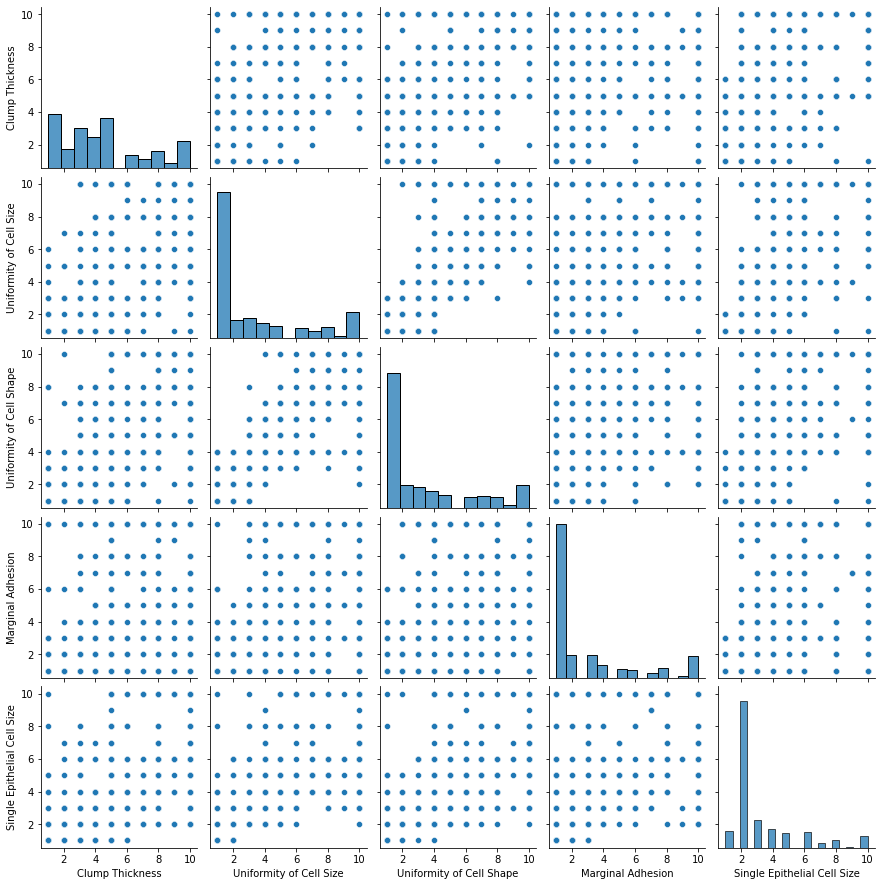

In [ ]:
sns.pairplot(dataset.iloc[:, 1:6])

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the models

In [ ]:
#Create a function for models
def models(X_train,y_train):

  #K-nearest Neigbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Support vector Classifier
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Decision Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #Print the model accuracy on the training data
  print('[0] K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[1] Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[2] Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
   
  return knn, svc_lin, tree   





In [ ]:
#Get all of the models
model = models(X_train, y_train)

[0] K Nearest Neighbor Training Accuracy: 0.9816849816849816
[1] Support Vector Machine (Linear Classifier) Training Accuracy: 0.9725274725274725
[2] Decision Tree Classifier Training Accuracy: 1.0


In [ ]:
#Confusion matrix on testing data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model',i)
  cm = confusion_matrix(y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model 0
[[84  3]
 [ 1 49]]
Testing accuracy =  0.9708029197080292

Model 1
[[83  4]
 [ 2 48]]
Testing accuracy =  0.9562043795620438

Model 2
[[84  3]
 [ 3 47]]
Testing accuracy =  0.9562043795620438



#Show other ways to get the classification accuracy & other metrics 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model',i)
  print( classification_report(y_test, model[i].predict(X_test)))
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        87
           4       0.94      0.98      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

0.9708029197080292

Model 1
              precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137

0.9562043795620438

Model 2
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted a